## Open Street Map Query for Cities and Villages 
    URL for OSM Overpass Turbo: https://overpass-turbo.eu/
    URL for OSM Features: https://wiki.openstreetmap.org/wiki/Map_Features#Populated_settlements.2C_urban

### Example from Ghana for Towns ... For cities, use *place=city*
    area["name"="Ghana"]->.boundaryarea;
    (
    node(area.boundaryarea)[place=town];
    way(area.boundaryarea)[place=town];>;
    rel(area.boundaryarea)[place=town];>>;
    );
    out meta;
    // print results
    out body;
    >;
    out skel qt;

In [1]:
import os
import matplotlib.pyplot as plt
import rasterio
from rasterio import plot
from rasterio.mask import mask
import geopandas as gpd
import fiona
import rasterio
import rasterio.mask
import numpy as np
import skimage.io as skio

In [4]:
cwd = os.getcwd()
filepath = "/home/cascade/tana-crunch-cascade/"

In [20]:
ghana100m_2010 = rasterio.open(filepath+"GHA10_040213.tif")
ghana100m_2010.meta

{'count': 1,
 'crs': CRS({'init': 'epsg:4326'}),
 'driver': 'GTiff',
 'dtype': 'float32',
 'height': 7725,
 'nodata': -3.4028234663852886e+38,
 'transform': Affine(0.0008332999999999998, 0.0, -3.262515242688516,
       0.0, -0.0008332999999999998, 11.174256111176145),
 'width': 5353}

In [32]:
test = ghana100m_2010.read(1)

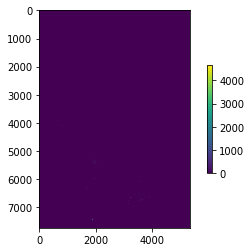

In [39]:
import copy
    
test_copy = copy.copy(test)
test_copy[test<1] = 0

plt.imshow(test_copy)
plt.colorbar(shrink=0.5)

In [43]:
query(test_copy)

NameError: name 'query' is not defined

/opt/anaconda3/lib/python3.6/site-packages/skimage/io/_plugins/matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and
/opt/anaconda3/lib/python3.6/site-packages/skimage/io/_plugins/matplotlib_plugin.py:74: UserWarning: Low image data range; displaying image with stretched contrast.
  warn("Low image data range; displaying image with "
/opt/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_base.py:1400: MatplotlibDeprecationWarning: The 'box-forced' keyword argument is deprecated since 2.2.
  " since 2.2.", cbook.mplDeprecation)


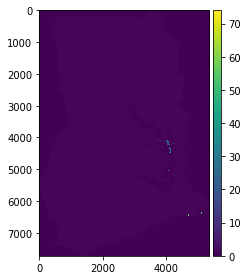

In [21]:
from skimage import measure
label_test = measure.label(test_copy, background=0)
skio.imshow(label_test)

In [7]:
# ask Kelly about what to do with the nodata values messing everything up 
ghana100m_2010 = rasterio.open(filepath+"GHA10_040213.tif")
ghana100m_2010.meta

{'driver': 'GTiff',
 'dtype': 'float32',
 'nodata': -3.4028234663852886e+38,
 'width': 5353,
 'height': 7725,
 'count': 1,
 'crs': CRS({'init': 'epsg:4326'}),
 'transform': (-3.262515242688516,
  0.0008332999999999998,
  0.0,
  11.174256111176145,
  0.0,
  -0.0008332999999999998),
 'affine': Affine(0.0008332999999999998, 0.0, -3.262515242688516,
        0.0, -0.0008332999999999998, 11.174256111176145)}

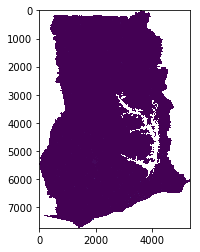

In [8]:
plot.show(ghana100m_2010)

In [9]:
ghana100m_2010_arr = ghana100m_2010.read_band(1)

/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2961: FutureWarning: read_band() is deprecated and will be removed by Rasterio 1.0. Please use read() instead.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [10]:
# check data range
np.unique(ghana100m_2010_arr)

array([-3.4028235e+38,  0.0000000e+00,  1.7775760e-04, ...,
        3.6459636e+03,  3.9676597e+03,  4.6669546e+03], dtype=float32)

Text(0,0.5,'Row #')

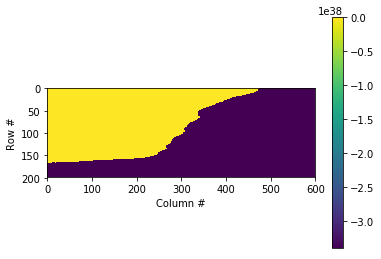

In [11]:
# Zoom into a subset
#window = rasterio.windows.Window(1024, 1024, 1280, 2560)

subset = ghana100m_2010.read(1, window=((7000, 7200), (2700, 3300)))

plt.figure(figsize=(6,8.5))
plt.imshow(subset)
plt.colorbar(shrink=0.5)
#plt.title(f'Band 4 Subset\n{window}')
plt.xlabel('Column #')
plt.ylabel('Row #')

In [12]:
type(subset)

numpy.ndarray

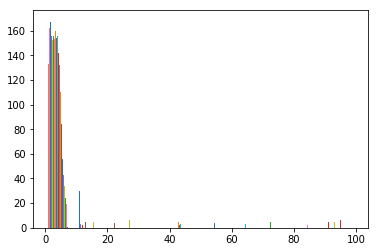

In [13]:
plt.hist(subset, range = [0,100])
plt.show()

In [14]:
import copy

subset_copy = copy.copy(subset)
subset_copy[subset<1] = 0

Text(0,0.5,'Row #')

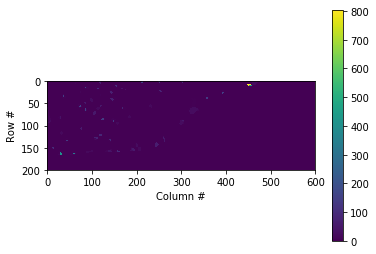

In [15]:
plt.figure(figsize=(6,8.5))
plt.imshow(subset_copy)
plt.colorbar(shrink=0.5)
plt.xlabel('Column #')
plt.ylabel('Row #')

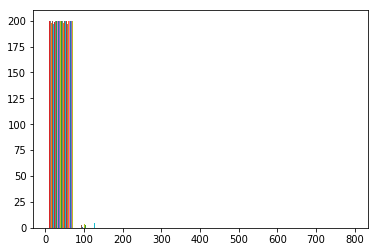

In [17]:
plt.hist(subset_copy)
plt.show()

In [64]:
test = rasterio.open(filepath+"GHA10_040213.tif")

In [73]:
test.mask

/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2961: FutureWarning: read_band() is deprecated and will be removed by Rasterio 1.0. Please use read() instead.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [74]:
type(test_band)

numpy.ndarray

In [45]:
from rasterio.features import shapes
mask = None
with rasterio.drivers():
    with rasterio.open(filepath+"GHA10_040213.tif", window = ((7000, 7200), (2700, 3300))) as src:
        image = src.read(1) # first band
        results = (
        {'properties': {'raster_val': v}, 'geometry': s}
        for i, (s, v) 
        in enumerate(
            shapes(image, mask=mask, transform=src.affine)))

In [46]:
geoms = list(results)

In [48]:
print(geoms[4])

{'properties': {'raster_val': 0.26214757561683655}, 'geometry': {'type': 'Polygon', 'coordinates': [[(-0.28180114268851675, 11.151757011176146), (-0.28180114268851675, 11.148423811176146), (-0.27930124268851664, 11.148423811176146), (-0.27930124268851664, 11.151757011176146), (-0.28180114268851675, 11.151757011176146)]]}}


In [49]:
import geopandas as gp
gpd_polygonized_raster  = gp.GeoDataFrame.from_features(geoms)

In [54]:
gpd_polygonized_raster

,geometry,raster_val
0,POLYGON ((-0.2709682426885167 11.1717562111761...,2.357377e+00
1,POLYGON ((-0.2734681426885168 11.1717562111761...,8.602970e-01
2,POLYGON ((-0.2784679426885166 11.1734228111761...,2.357377e+00
3,POLYGON ((-0.2759680426885165 11.1625899111761...,2.621476e-01
4,POLYGON ((-0.2818011426885167 11.1517570111761...,2.621476e-01
5,POLYGON ((-0.2793012426885166 11.1484238111761...,2.621476e-01
6,POLYGON ((-0.2126372426885168 11.1575901111761...,2.002605e+00
7,POLYGON ((-0.1843050426885169 11.1500904111761...,1.741318e+00
8,POLYGON ((-0.4051295426885164 11.1250914111761...,1.867280e-01
9,POLYGON ((-0.2351363426885165 11.1325911111761...,4.565384e+00
